
# <p align="center">Eigen Portfolios: Optimizing Portfolios using Principle Component Analysis</p>


<p align="justify">Eigenportfolios are investment strategies designed to optimize the risk-adjusted performance of a portfolio, as measured by the Sharpe Ratio. The Sharpe Ratio is a metric that evaluates the excess return of a portfolio above the risk-free rate, relative to its volatility. To construct an eigenportfolio, one must address an optimization challenge that aims to maximize the expected return of the portfolio while maintaining the risk, or the standard deviation of returns, within a specified threshold.</p>

<p align="justify">This optimization is typically achieved through the application of Principal Component Analysis (PCA) to the covariance matrix of asset returns. PCA is a statistical technique that transforms the original correlated variables into a set of values of linearly uncorrelated variables called principal components. By focusing on the principal components associated with the largest eigenvalues, which explain the most variance in the dataset, investors can identify the combination of assets that contribute most significantly to the portfolio's variance. These principal components can then be used to form an eigenportfolio that is optimized for the highest possible Sharpe Ratio, balancing expected returns against the inherent investment risk.</p>


In [167]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

The data consists of asset prices for various S&P 500 stocks. The data is cleaned by dropping any missing values and renaming the columns to remove any leading or trailing spaces.

In [168]:
asset_prices = (
    pd.read_csv(
        r"C:\Users\Ashish\Documents\DAU\Projects\Eigenportfolio\data\spx_holdings_and_spx_closeprice.csv",
        date_format="%Y-%m-%d",
        index_col=0,
    )
    .dropna()
    .rename(columns=lambda x: x.strip())
)

n_stocks_show = 20
print("Asset prices shape", asset_prices.shape)
asset_prices.iloc[:, :n_stocks_show].head()

Asset prices shape (3493, 419)


,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIV,AKAM,AKS,ALL
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625,37.9375,20.5938,39.688,1175.5873,26.8393,281.1250,10.8125,23.1875
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000,38.1875,21.0000,40.250,1139.2866,26.8393,270.0625,11.0000,22.8125
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000,40.0625,21.7188,40.313,1165.8141,26.9281,249.1250,10.1250,23.1875
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875,40.3750,22.1563,41.375,1143.4751,26.9726,239.0625,9.9375,23.0625
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250,39.6563,22.1875,42.813,1142.7770,26.9281,233.6250,10.0000,23.3125


In [169]:
asset_prices

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,...,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,...,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457,1398.56
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,...,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742,1360.16
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,...,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722,1394.46
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,...,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151,1409.28
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,...,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192,1409.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-16,39.5014,21.4325,79.6429,68.4500,36.5300,58.5000,48.7400,40.6600,68.0013,47.1850,...,56.0649,46.1300,28.3837,50.4479,15.7890,12.4337,40.6100,26.0264,44.6344,1786.54
2013-12-17,40.3094,21.7237,79.2843,68.3500,36.6100,57.6700,48.9400,41.4800,67.7689,47.5000,...,56.4258,46.8300,28.3401,50.2511,16.1250,12.3964,39.8600,26.0648,44.4022,1781.00
2013-12-18,41.3964,22.0148,78.6814,69.6100,38.1200,59.0400,49.7800,43.1400,69.3830,48.2700,...,57.4609,47.5300,28.6980,51.1603,16.0194,12.7089,40.9200,26.1321,45.3786,1810.65
2013-12-19,41.0317,22.3284,77.7800,69.6300,38.0300,58.1300,49.6600,43.7900,69.6769,48.0450,...,57.7552,48.0900,28.6456,50.6260,15.9042,12.8162,39.8500,27.4953,45.2364,1809.60


In [170]:
print('Last column contains SPX index prices:')
asset_prices.iloc[:, -10:].head()

Last column contains SPX index prices:


,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-27,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457,1398.56
2000-01-28,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742,1360.16
2000-01-31,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722,1394.46
2000-02-01,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151,1409.28
2000-02-02,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192,1409.12


The asset prices are then used to calculate daily asset returns, which are the percentage changes in the asset prices from one day to the next. These returns are normalized by subtracting the mean and dividing by the standard deviation. This normalization process is crucial for PCA since it ensures that each asset's returns have the same scale.

In [171]:
# Part 1 (Asset Returns Calculation)

# Calculate percent returns, also known as simple returns using asset prices.
asset_returns = asset_prices.pct_change().dropna()

# Normalize stock returns by subtracting the mean and dividing by standard deviation.
normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()

normed_returns.iloc[-5:, -10:].head()

,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2013-12-16,0.852722,0.965219,-1.168885,0.884751,0.095865,0.656639,0.180014,-0.238498,0.465047,0.467931
2013-12-17,0.275173,0.517307,-0.086106,-0.306213,0.589689,-0.118610,-0.549523,0.025268,-0.260013,-0.247921
2013-12-18,0.864485,0.509435,0.600714,1.210605,-0.190024,0.925461,0.756998,0.058428,0.952458,1.252703
2013-12-19,0.210069,0.399574,-0.100159,-0.757419,-0.208023,0.304913,-0.772205,1.544228,-0.167775,-0.056358
2013-12-20,0.827306,0.748420,0.372443,1.048113,0.264046,0.436874,0.320641,-0.740854,0.373717,0.353859


In [172]:
# 1st result normalized returns
normed_returns.iloc[0, :100].squeeze()

A      -0.190054
AA     -0.513710
AAPL   -2.714709
ABC    -0.049779
ABT     2.182933
          ...   
DF     -0.213750
DGX     0.866538
DHI    -0.534756
DHR     0.926530
DIS    -0.510248
Name: 2000-01-28 00:00:00, Length: 100, dtype: float64

In [173]:
normed_returns

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,...,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-28,-0.190054,-0.513710,-2.714709,-0.049779,2.182933,-2.684131,-0.212461,-0.766996,-1.540731,-1.803947,...,-1.280756,-1.690468,1.853435,-1.032223,-2.354104,-0.735242,0.619711,-0.873112,-0.652514,-2.098603
2000-01-31,-0.898232,0.096888,0.688156,-1.757230,1.355644,-1.438899,-0.720771,-0.279098,-1.891884,-0.391433,...,0.845295,1.631244,1.457667,-0.877804,0.828987,0.498547,-0.789312,-0.824893,0.333856,1.903871
2000-02-01,2.319164,1.264327,-1.227995,1.539597,0.588289,0.451774,1.606541,0.975244,0.948126,1.272129,...,-1.166142,-1.334823,0.939094,0.473545,2.346267,0.258770,-0.093661,-0.018944,1.228056,0.795259
2000-02-02,2.471738,1.221529,-0.548494,0.464060,0.339454,3.133764,-0.616815,-1.012898,-3.348109,0.177340,...,-0.681225,-0.635746,-0.322437,0.131399,0.642124,0.719436,0.944422,-0.094098,-0.726004,-0.020920
2000-02-03,0.510174,-1.122380,1.551619,-0.388563,0.336944,4.078966,3.310577,-0.029293,4.090396,1.217955,...,1.248858,-0.392056,-0.324442,0.974903,1.334599,0.219252,-0.632596,-0.471922,1.124028,0.842399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-16,0.032351,0.227351,0.149061,-0.049779,0.202478,-1.303091,0.214563,0.345160,0.374515,-0.444385,...,0.852722,0.965219,-1.168885,0.884751,0.095865,0.656639,0.180014,-0.238498,0.465047,0.467931
2013-12-17,0.642241,0.490683,-0.202992,-0.124572,0.113968,-0.488793,0.123138,0.922689,-0.227194,0.204113,...,0.275173,0.517307,-0.086106,-0.306213,0.589689,-0.118610,-0.549523,0.025268,-0.260013,-0.247921
2013-12-18,0.851202,0.483930,-0.311751,0.893983,2.616277,0.744003,0.563205,1.859793,1.437586,0.541969,...,0.864485,0.509435,0.600714,1.210605,-0.190024,0.925461,0.756998,0.058428,0.952458,1.252703
2013-12-19,-0.296909,0.514485,-0.446821,-0.035070,-0.177613,-0.528601,-0.096350,0.681946,0.240632,-0.197612,...,0.210069,0.399574,-0.100159,-0.757419,-0.208023,0.304913,-0.772205,1.544228,-0.167775,-0.056358


* The normalized returns are split into training and testing subsets.
* The training data is used to fit the PCA model, and the testing data is used to evaluate the performance of the eigen-portfolios.
* The split is based on a specified date, with data up to that date being used for training and data after that date for testing

In [174]:
train_end = datetime.datetime(2009, 1, 1)

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (2242, 419)
Test dataset: (1250, 419)


* Calculate the covariance matrix of the training data excluding the "SPX" column and fit the PCA model.
* Plot the cumulative explained variance by PCA components to visualize how many components are needed to explain most of the variance.

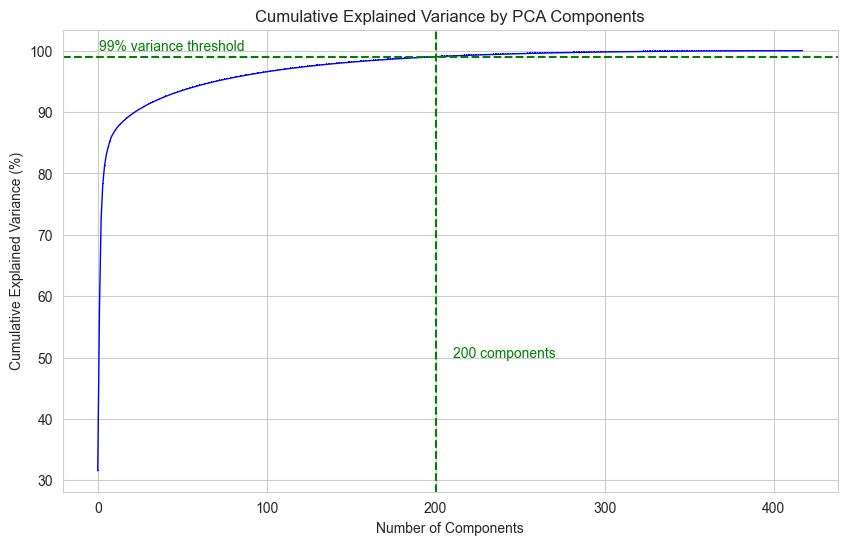

In [175]:
stock_tickers = asset_returns.columns.values[:-1]
assert "SPX" not in stock_tickers, "By accident included SPX index"

cov_matrix = df_train.loc[:, df_train.columns != "SPX"].cov()
pca = PCA(svd_solver="full", random_state=10).fit(cov_matrix)
pcs = pca.components_

cov_matrix_raw = df_raw_train.loc[:, df_raw_train.columns != "SPX"].cov()
cov_raw_df = pd.DataFrame({"Variance": np.diag(cov_matrix_raw)}, index=stock_tickers)
var_explained = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance = var_explained * 100

var_threshold = 99
num_components_threshold = (
    np.where(cumulative_explained_variance >= var_threshold)[0][0] + 1
)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(
    cumulative_explained_variance,
    marker=",",
    linestyle="-",
    color="b",
    markersize=5,
    linewidth=1,
)
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True)

# Add a horizontal line to show the 99% variance threshold
plt.axhline(y=99, color="g", linestyle="--")
plt.text(0.5, 100, "99% variance threshold", color="g")

# Add a vertical line to show the number of components needed to reach the variance threshold
plt.axvline(x=num_components_threshold, color="g", linestyle="--")
plt.text(
    num_components_threshold + 10,
    50,
    f"{num_components_threshold} components".strip(),
    color="green",
    rotation=0,
)
plt.show()

In [176]:
cov_matrix

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,...,SPLS,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1
A,1.265639,0.377609,0.444828,0.129916,0.112390,0.491489,0.681799,0.194434,0.351313,0.426413,...,0.360389,0.280427,0.109514,0.165773,0.264879,0.602805,0.214059,0.058041,0.292031,0.354078
AA,0.377609,0.989080,0.295515,0.268818,0.302806,0.357339,0.357604,0.439627,0.426837,0.324636,...,0.405815,0.306267,0.250924,0.292227,0.366596,0.390036,0.278388,0.214386,0.620135,0.428318
AAPL,0.444828,0.295515,1.326269,0.169357,0.154675,0.525725,0.551483,0.220488,0.337942,0.425758,...,0.373987,0.181743,0.164055,0.199836,0.264623,0.542054,0.200500,0.084155,0.318400,0.362713
ABC,0.129916,0.268818,0.169357,1.271651,0.397363,0.266160,0.224426,0.260175,0.336616,0.199605,...,0.231351,0.317296,0.209494,0.236175,0.320736,0.176528,0.163565,0.274041,0.230149,0.263288
ABT,0.112390,0.302806,0.154675,0.397363,1.236773,0.199057,0.170816,0.281398,0.380064,0.174726,...,0.280666,0.357943,0.210524,0.312705,0.339480,0.131864,0.205301,0.234249,0.233346,0.262787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TER,0.602805,0.390036,0.542054,0.176528,0.131864,0.574974,0.846437,0.216456,0.405890,0.459985,...,0.375090,0.242574,0.128381,0.170873,0.288147,1.207670,0.236292,0.131958,0.326206,0.381273
TGNA,0.214059,0.278388,0.200500,0.163565,0.205301,0.217481,0.237855,0.212714,0.310879,0.225388,...,0.310832,0.182628,0.178103,0.201996,0.248710,0.236292,0.487144,0.130017,0.256675,0.327846
THC,0.058041,0.214386,0.084155,0.274041,0.234249,0.111567,0.100581,0.150003,0.149384,0.139106,...,0.185639,0.162373,0.158675,0.217484,0.192182,0.131958,0.130017,0.857582,0.216669,0.202783
X,0.292031,0.620135,0.318400,0.230149,0.233346,0.316256,0.317891,0.410597,0.357509,0.318754,...,0.351931,0.277652,0.230674,0.277699,0.354801,0.326206,0.256675,0.216669,0.954689,0.410042


Text(0.5, 0, 'Component Number')

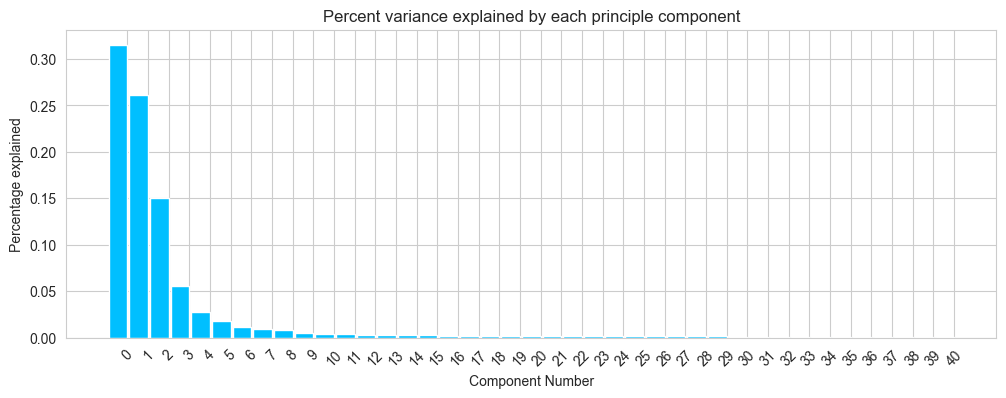

In [177]:
bar_width = 0.9
n_asset = normed_returns.shape[1] // 10
x_indx = np.arange(n_asset)
fig, ax = plt.subplots(figsize=(12, 4))
rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color="deepskyblue")
ax.set_xticks(x_indx + bar_width / 2)
ax.set_xticklabels(range(n_asset), rotation=45)
ax.set_title("Percent variance explained by each principle component")
# ax.legend([rects[0]], ["Percent variance explained by principal components"])
ax.set_ylabel("Percentage explained")
ax.set_xlabel("Component Number")

In [178]:
projected = pca.fit_transform(cov_matrix)

Define a function to calculate the Sharpe ratio, annualized volatility, and annualized return from time series returns, assuming a default of 252 trading days per year.

In [179]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    n_years = len(ts_returns) / periods_per_year
    pr = np.prod(1 + ts_returns)
    annual_return = np.power(pr, 1 / n_years) - 1 if pr > 0 else 0
    annual_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annual_sharpe = (
        (annual_return - 0.1) / annual_vol if annual_vol != 0 else 0
    )
    return annual_return, annual_vol, annual_sharpe

function to plot asset allocation of a given portfolio, plotting it's return on the test data and comparing it with the test benchmark

In [180]:
def plot_eigen_portfolio(n, plots: bool = True):
    pcs = pca.components_
    pc_w = pcs[:, n - 1] / pcs[:, n - 1].sum()

    pcs_sum = pcs[:, n-1].sum()
    print(f"PC{n} sum: {pcs_sum}")
    print(f"PC{n} weights range: {pcs[:, n-1].min()} → {pcs[:, n-1].max()}")


    eigen_prtf = pd.DataFrame({"weights": pc_w * 100}, index=stock_tickers)
    eigen_prtf.sort_values("weights", ascending=False, inplace=True)
    if plots:
        print(f"Sum of weights: {eigen_prtf['weights'].sum():.2f}")
        eigen_prtf.plot(
            title=f"{n}th eigen-portfolio weights",
            figsize=(20, 6),
            xticks=range(0, len(stock_tickers), 10),
            rot=60,
            linewidth=2,
        )
        plt.grid(True)
        plt.show()

    eigen_prtf_returns = pd.Series(
        np.dot(df_raw_test.loc[:, eigen_prtf.index], eigen_prtf / 100).squeeze(),
        index=df_test.index,
    )
    er, vol, sharpe = sharpe_ratio(eigen_prtf_returns)
    print(
        f"{n}th eigen-portfolio:\nCAGR = {er * 100:.2f}%\nVolatility = {vol * 100:.2f}%\nSharpe = {sharpe:.2f}"
    )
    df_plot = pd.DataFrame(
        {f"PC{n}": eigen_prtf_returns, "SPX": df_raw_test.loc[:, "SPX"]}
    )
    if plots:
        np.cumprod(df_plot + 1).plot(
            title=f"Returns of the market-cap weighted index vs. {n}th eigen-portfolio ({df_raw_test.index[0].date()} - {df_raw_test.index[-1].date()})",
            figsize=(20, 8),
            linewidth=1.5,
            style=["-", "-"],
            color=["#007bff", "#ff0000"],
        )
        plt.legend(loc="upper left", fontsize=12)
        plt.grid(True, axis="y")
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Cumulative Returns (x initial investment)", fontsize=12)
        plt.show()
    
    return er, vol, sharpe

plotting details and performance of 1st eigen portfolio

PC1 sum: 1.1272024844338056
PC1 weights range: -0.14388407872007594 → 0.17191068986629832
Sum of weights: 100.00


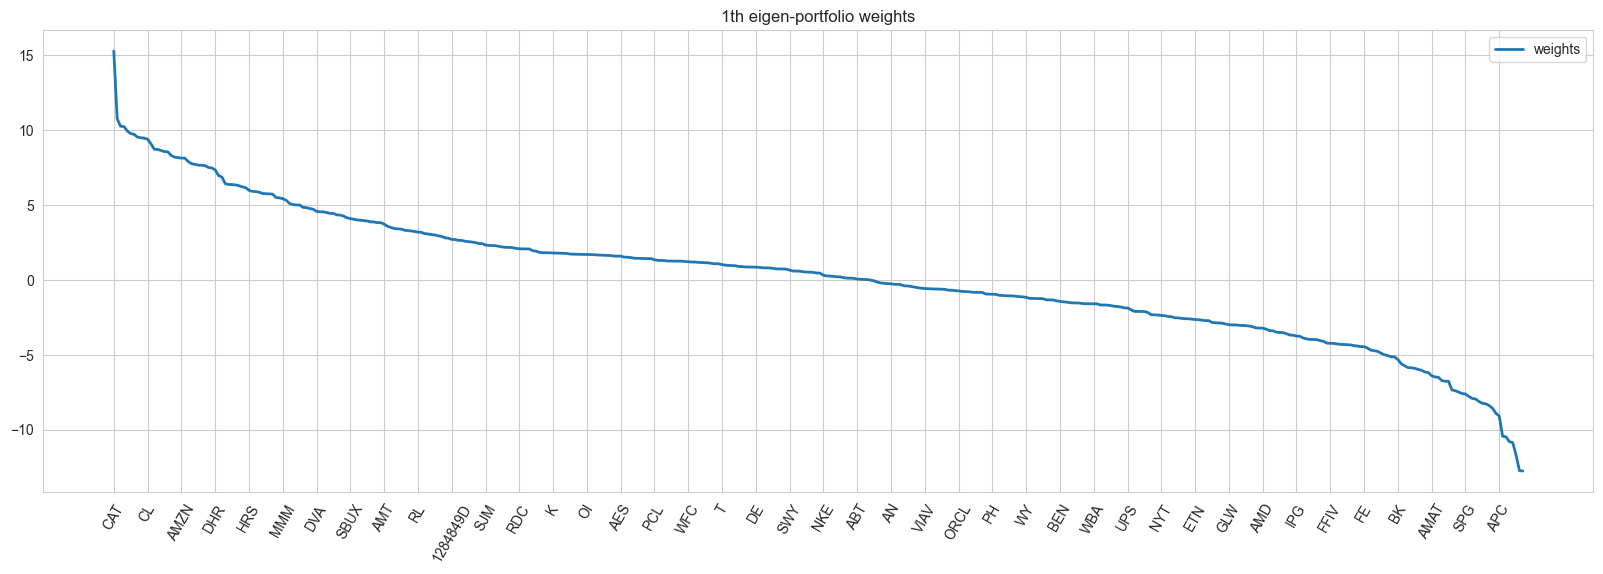

1th eigen-portfolio:
CAGR = 17.58%
Volatility = 32.26%
Sharpe = 0.23


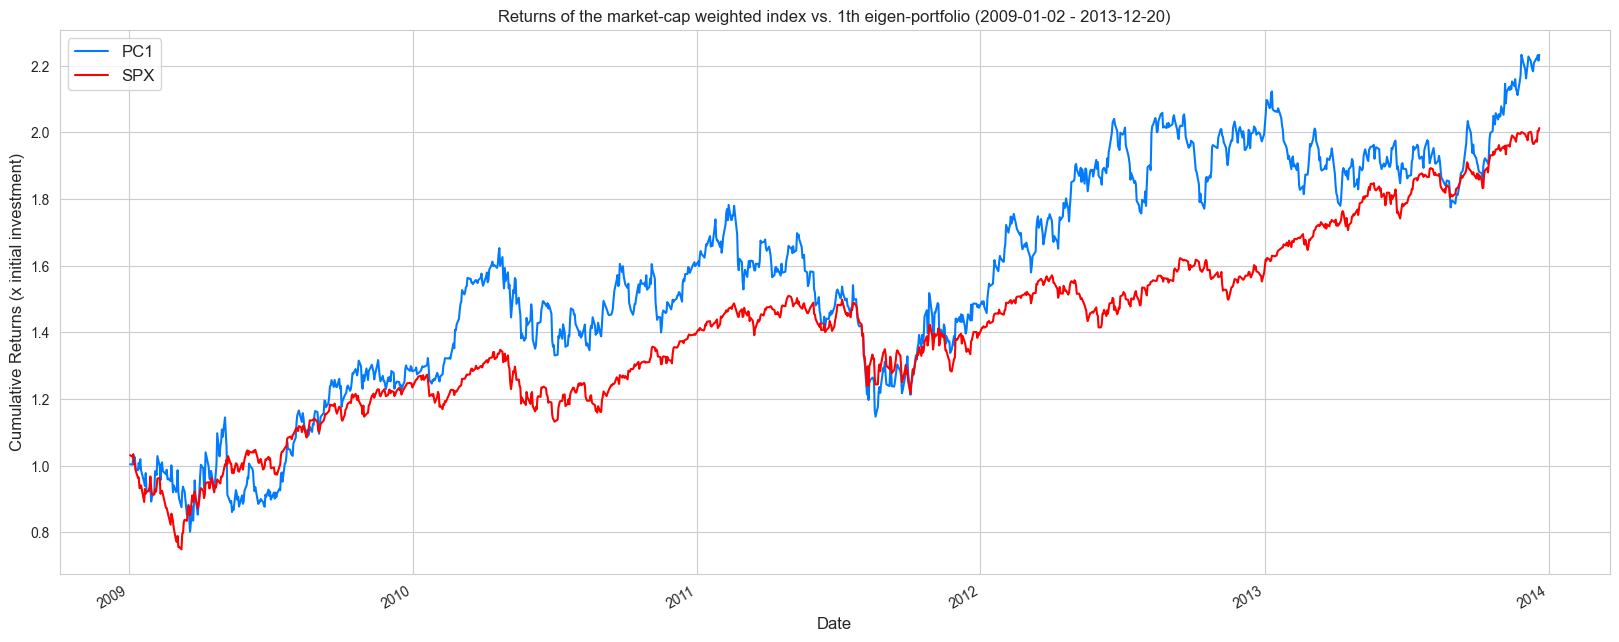

(np.float64(0.17576554016325296),
 np.float64(0.3226143091521046),
 np.float64(0.23484866608173724))

In [181]:
plot_eigen_portfolio(1)

plotting details and performance of 2nd eigen portfolio

PC2 sum: -1.5655341037035102
PC2 weights range: -0.1472912587536743 → 0.17342511908763075
Sum of weights: 100.00


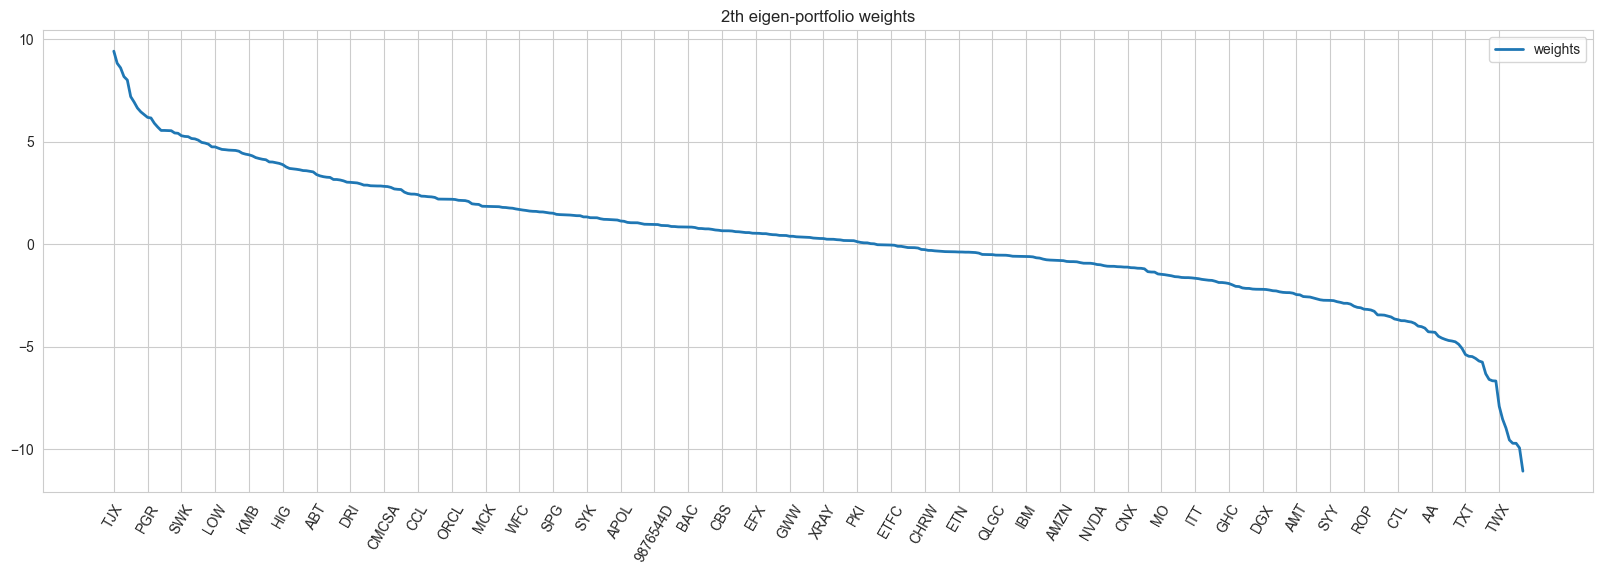

2th eigen-portfolio:
CAGR = 10.78%
Volatility = 30.41%
Sharpe = 0.03


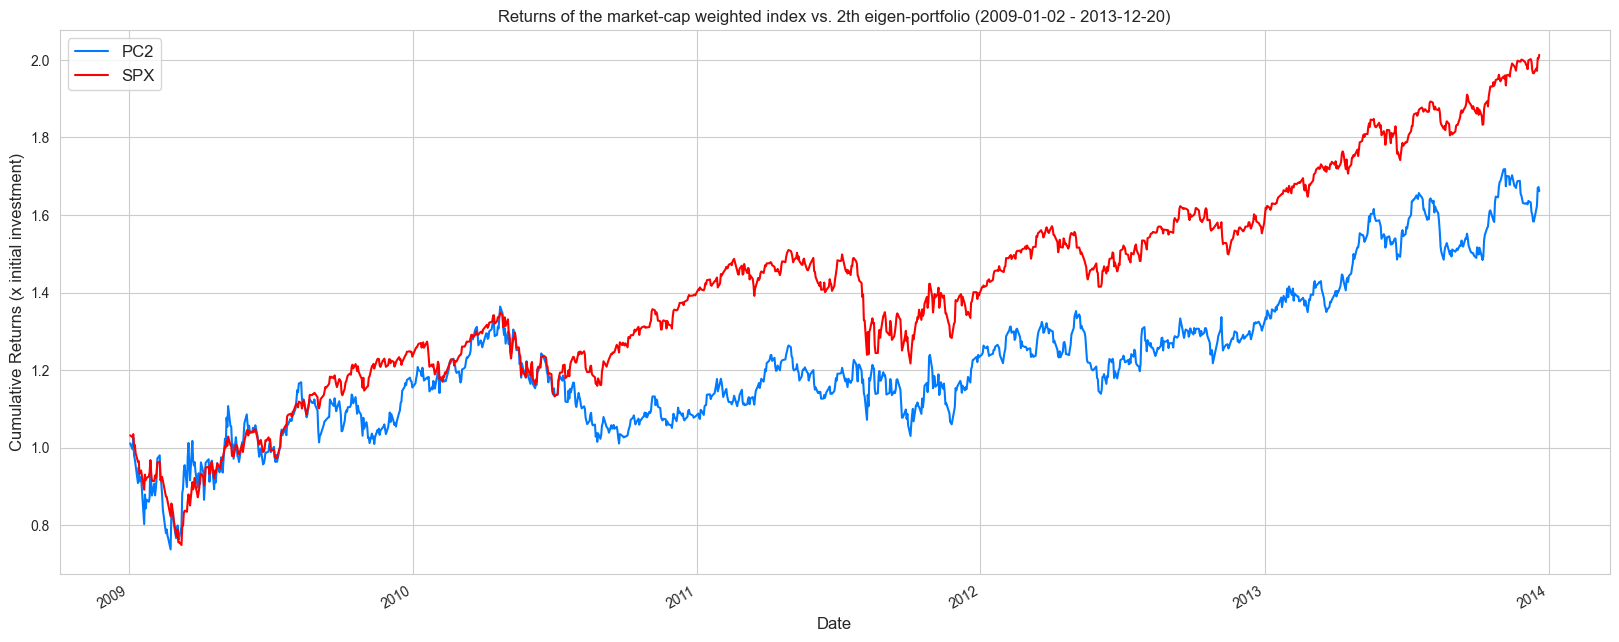

(np.float64(0.10777933864815403),
 np.float64(0.30409972079066894),
 np.float64(0.025581538279375923))

In [182]:
plot_eigen_portfolio(2)

plotting details and performance of 3rd eigen portfolio

PC3 sum: -0.11642484940854048
PC3 weights range: -0.23533863597414145 → 0.18980085290789897
Sum of weights: 100.00


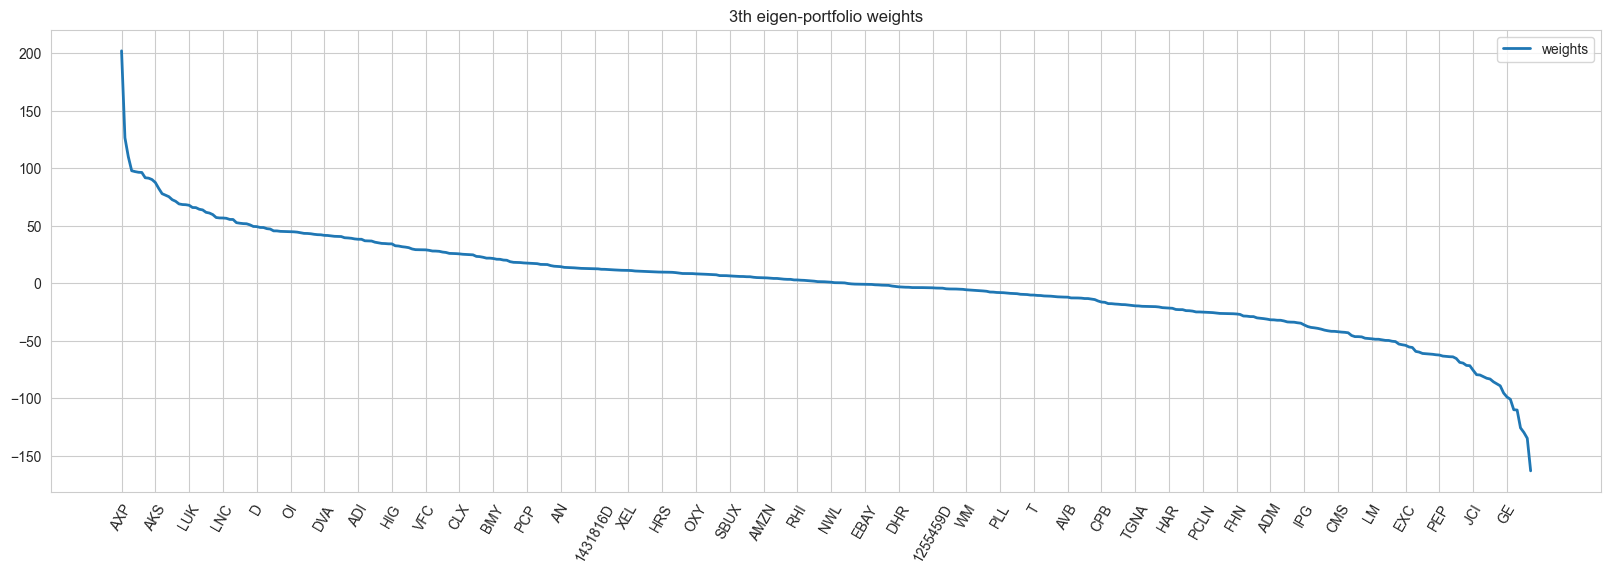

3th eigen-portfolio:
CAGR = -97.01%
Volatility = 296.64%
Sharpe = -0.36


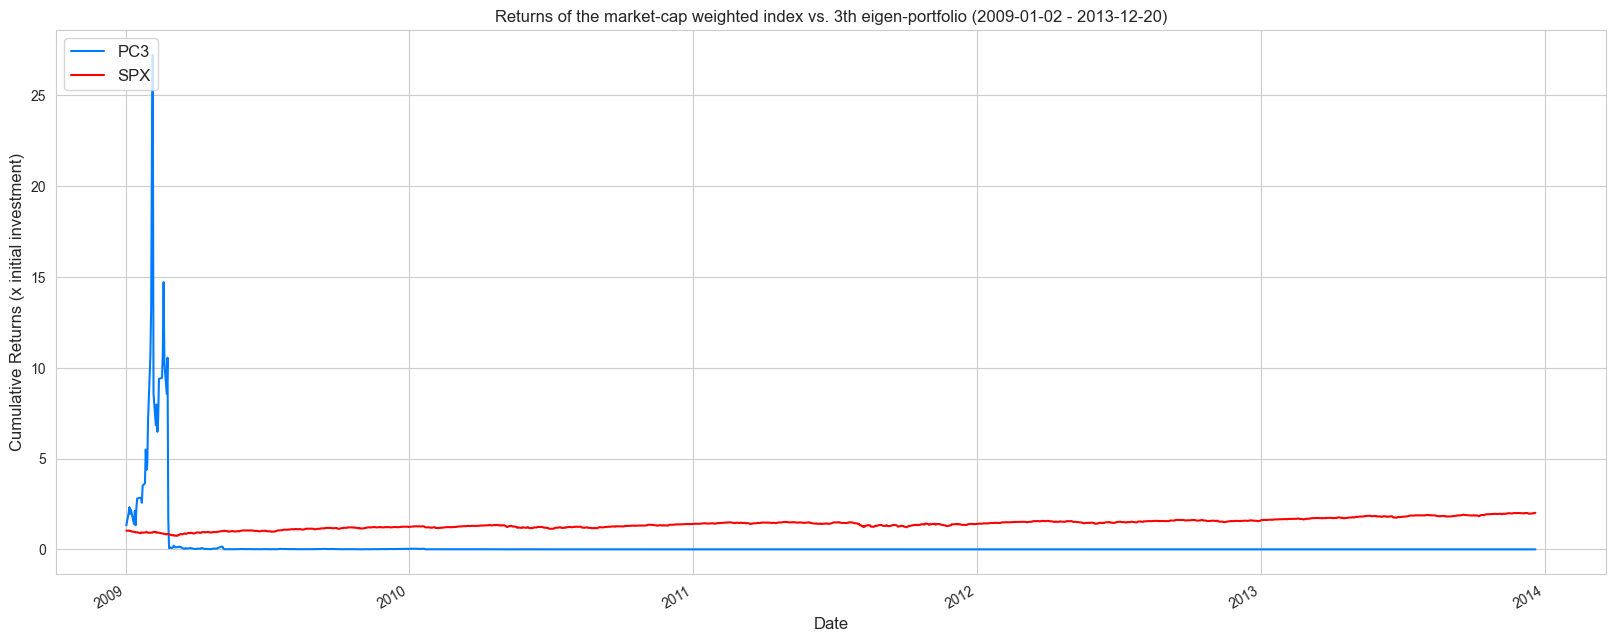

(np.float64(-0.9701412511262788),
 np.float64(2.966437007437492),
 np.float64(-0.360749696839409))

In [183]:
plot_eigen_portfolio(3)

finding the best performing portfolio among all possible eigenportfolios, we pick the one with max sharpe ratio, we also plot the sharpe ratio of all the eigenportfolio

c:\Users\Ashish\Documents\DAU\Projects\Eigenportfolio\.venv\Lib\site-packages\numpy\_core\_methods.py:55: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Ashish\Documents\DAU\Projects\Eigenportfolio\.venv\Lib\site-packages\numpy\_core\_methods.py:55: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


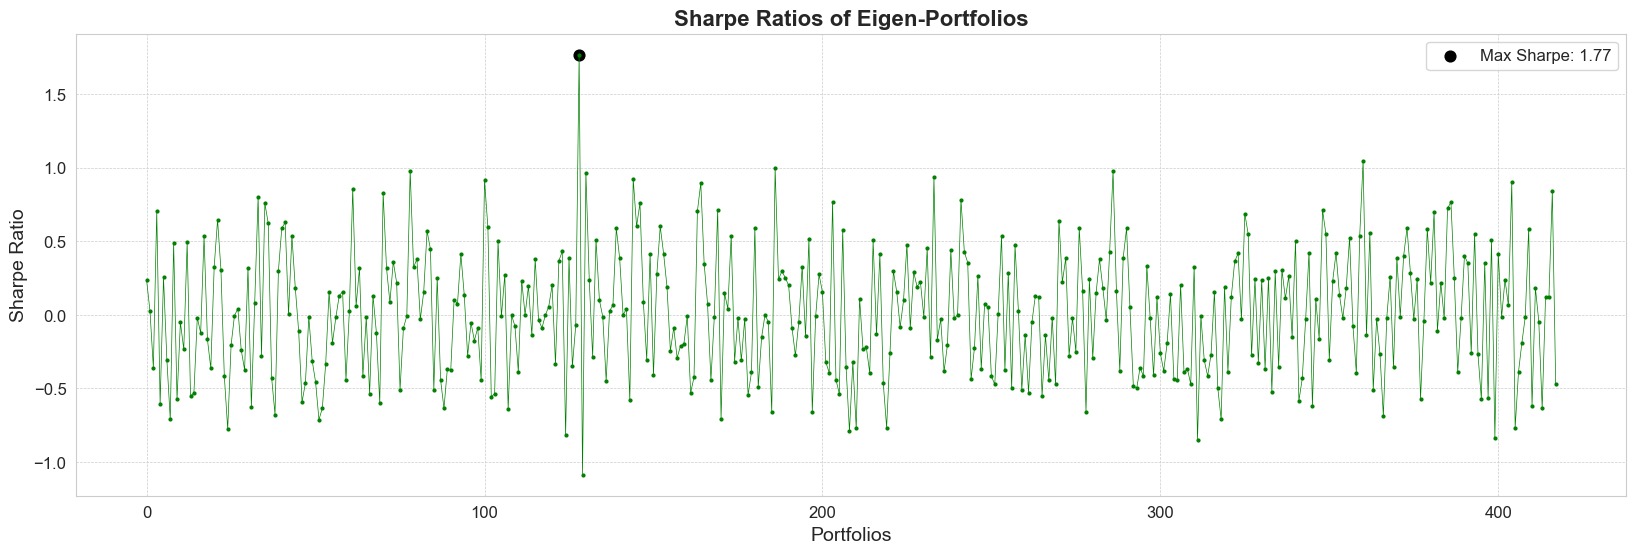

In [185]:
n_portfolios = asset_prices.shape[1] - 1
cagr = np.zeros(n_portfolios)
sharpe_metric = np.zeros(n_portfolios)
annualized_volatility = np.zeros(n_portfolios)

for ix in range(n_portfolios):
    pc_w = pcs[:, ix] / pcs[:, ix].sum()
    eigen_prtfix = pd.DataFrame(
        {"weights": pc_w * 100}, index=stock_tickers
    ).sort_values("weights", ascending=False)
    eigen_prtix_returns = pd.Series(
        np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100).squeeze(),
        index=df_test.index,
    )
    er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
    if sharpe <= 100:
        cagr[ix], annualized_volatility[ix], sharpe_metric[ix] = er, vol, sharpe


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot with enhanced aesthetics
plt.figure(figsize=(20, 6))
plt.plot(
    sharpe_metric,
    marker="o",
    linestyle="-",
    color="green",
    markersize=2,
    linewidth=0.5,
)
plt.title("Sharpe Ratios of Eigen-Portfolios", fontsize=16, fontweight="bold")
plt.xlabel("Portfolios", fontsize=14)
plt.ylabel("Sharpe Ratio", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5)

# Highlight the maximum Sharpe ratio
max_sharpe_idx = np.nanargmax(sharpe_metric)
max_sharpe = sharpe_metric[max_sharpe_idx]
plt.scatter(
    max_sharpe_idx,
    max_sharpe,
    color="black",
    s=60,
    label=f"Max Sharpe: {max_sharpe:.2f}",
)
plt.legend(fontsize=12)

plt.show()

PC129 sum: -0.7612956555205271
PC129 weights range: -0.13819929929927507 → 0.16480952147661948
Sum of weights: 100.00


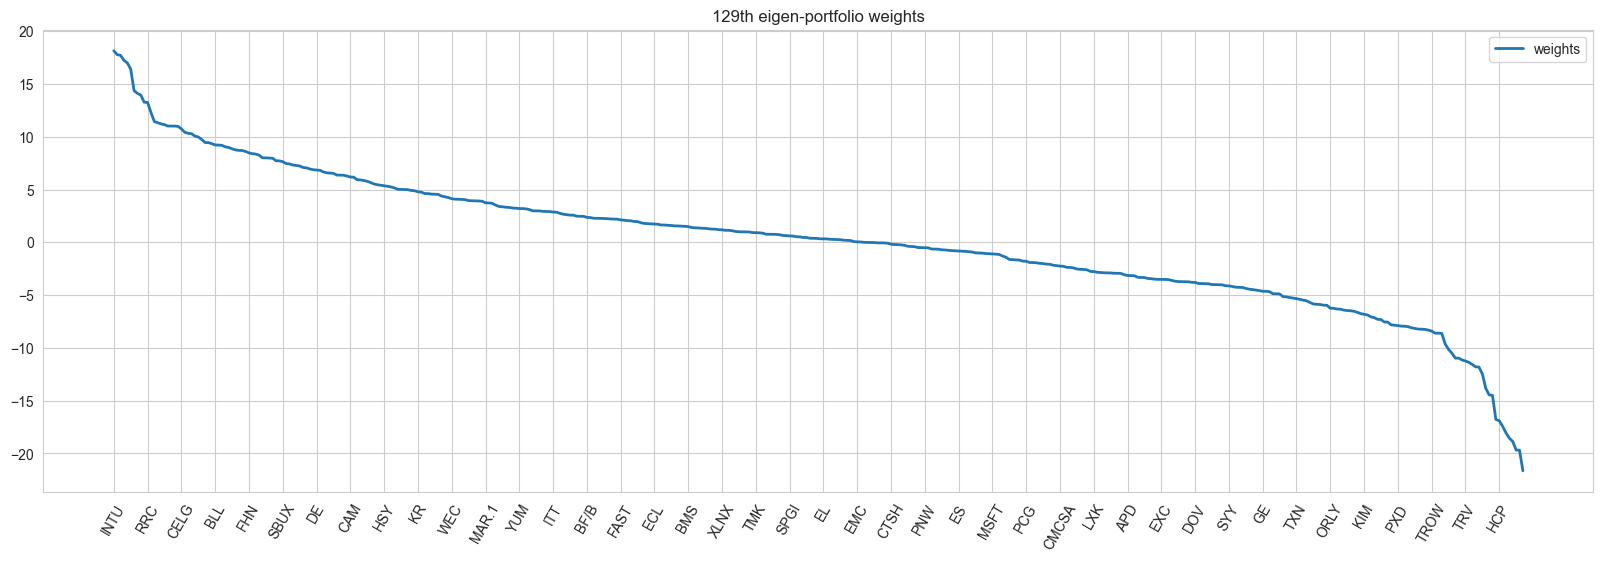

129th eigen-portfolio:
CAGR = 72.64%
Volatility = 35.47%
Sharpe = 1.77


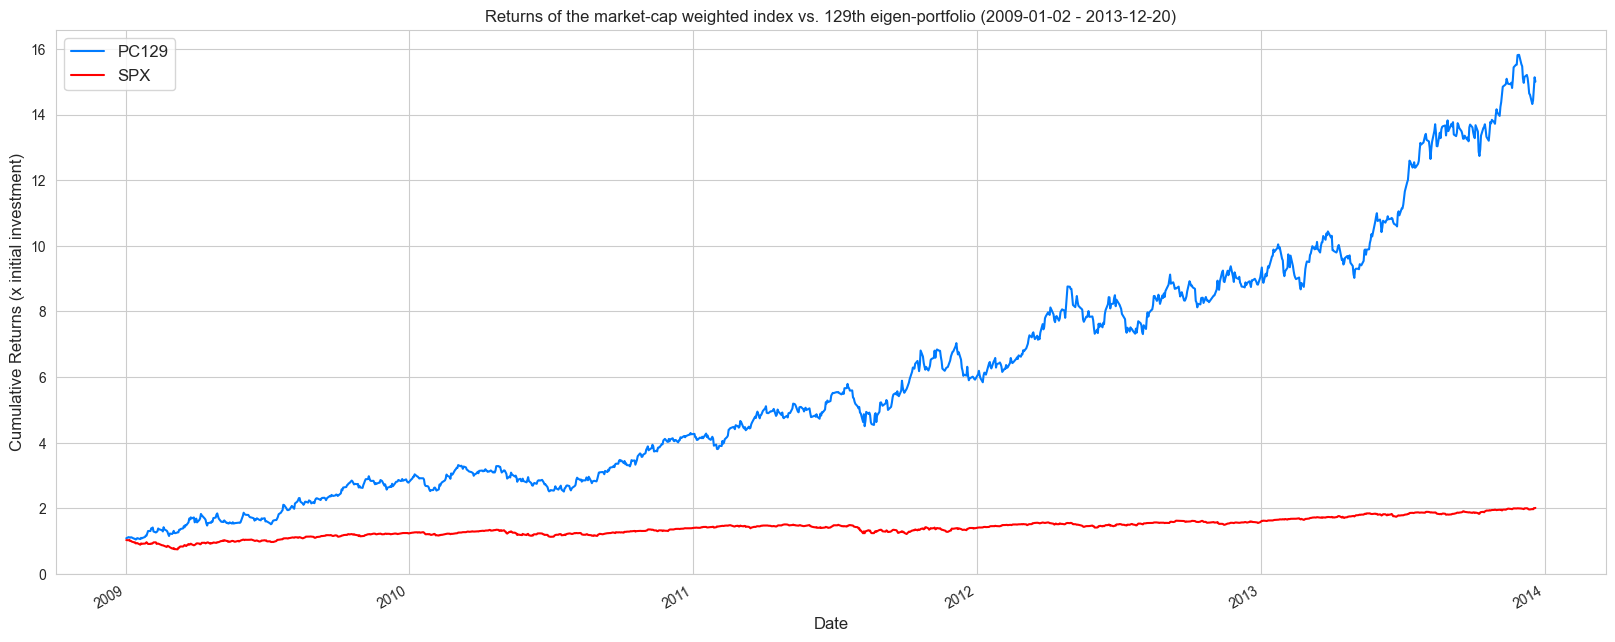

(np.float64(0.7263979683746347),
 np.float64(0.3546879626404843),
 np.float64(1.7660536425070583))

In [186]:
plot_eigen_portfolio(max_sharpe_idx + 1)

compiling metric of each portfolio into a dataframe and sorting it in descending order of sharpe ratio

In [187]:
results = pd.DataFrame(
    {
        "Return": cagr*100,
        "Vol": annualized_volatility*100,
        "Sharpe": sharpe_metric,
    }
).sort_values("Sharpe", ascending=False)
results.head(10)

,Return,Vol,Sharpe
128,72.639797,35.468796,1.766054
360,45.741520,34.247285,1.043631
186,33.462585,23.467181,0.999804
78,36.502730,27.051294,0.979721
286,33.926153,24.529845,0.975389
130,59.367305,51.088162,0.966316
233,36.232196,28.024905,0.936032
144,43.043327,35.780892,0.923491
100,32.935264,25.078089,0.914554
404,42.855519,36.565085,0.898549


creating a new metric: it's a product of return % and sharpe ratio, it tries to strike a balance between between risk and reward. We might get significant higher returns if we increse our risk apeptite a little. This metric is only calculated when both return % and sharpe ratio are positive

In [188]:
results = results.assign(metric=np.where((results['Return'] > 0) & (results['Sharpe'] > 0), results['Return'] * results['Sharpe'], 0))
results.sort_values(by="metric", ascending=False)

,Return,Vol,Sharpe,metric
128,72.639797,35.468796,1.766054,128.285778
130,59.367305,51.088162,0.966316,57.367573
360,45.741520,34.247285,1.043631,47.737259
144,43.043327,35.780892,0.923491,39.750119
241,49.953203,51.122347,0.781521,39.039493
...,...,...,...,...
46,-83.662625,158.123770,-0.592337,0.000000
341,-63.842607,126.349933,-0.584429,0.000000
143,-74.635192,145.694135,-0.580910,0.000000
9,-51.610744,107.299092,-0.574196,0.000000


In [189]:
modified_best = results.sort_values(by="metric", ascending=False).index[0]

PC129 sum: -0.7612956555205271
PC129 weights range: -0.13819929929927507 → 0.16480952147661948
Sum of weights: 100.00


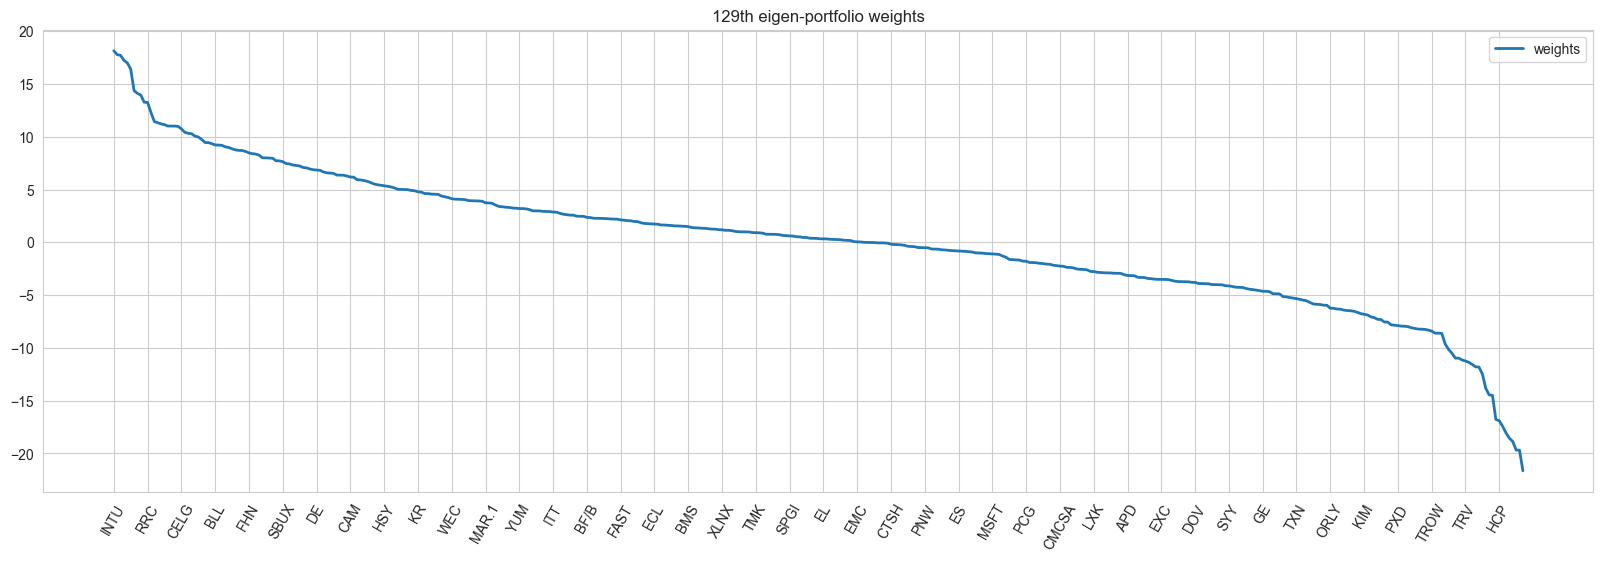

129th eigen-portfolio:
CAGR = 72.64%
Volatility = 35.47%
Sharpe = 1.77


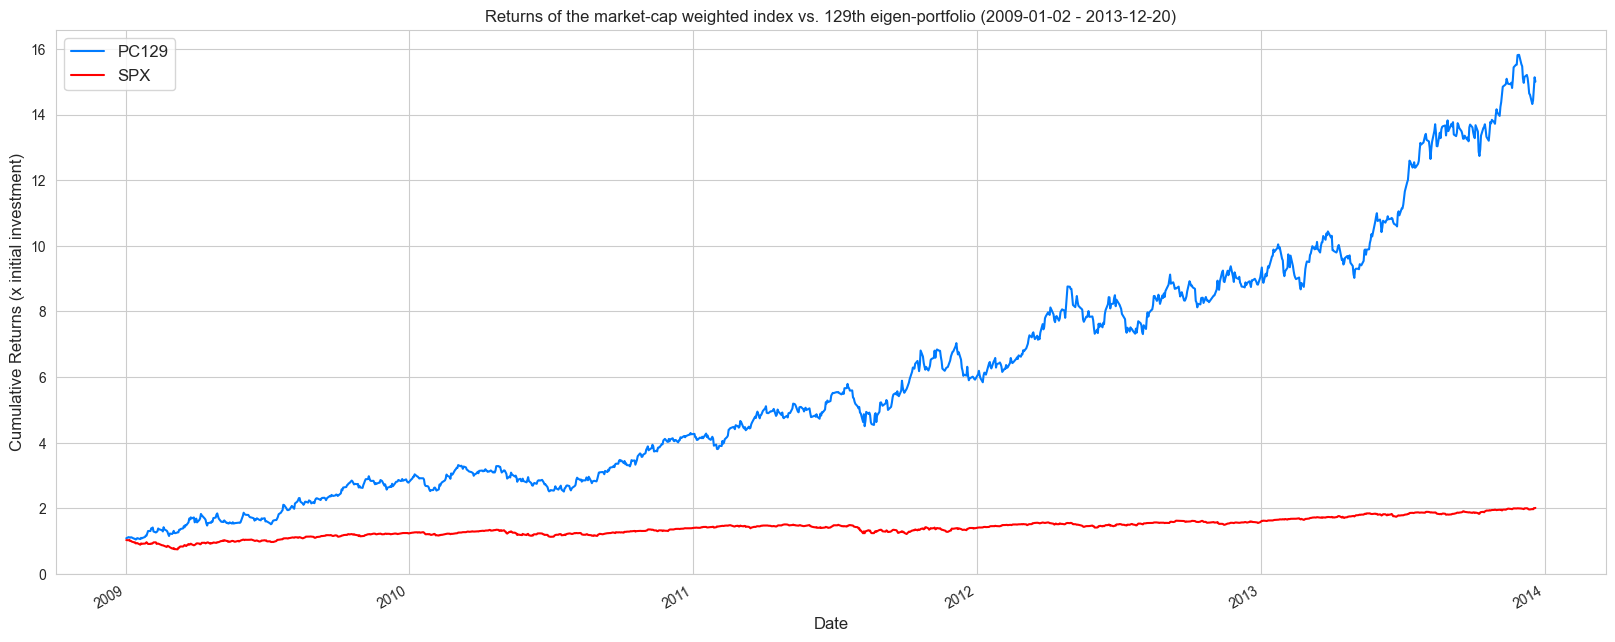

(np.float64(0.7263979683746347),
 np.float64(0.3546879626404843),
 np.float64(1.7660536425070583))

In [190]:
plot_eigen_portfolio(modified_best + 1)

In [197]:
valid_pcs = []
for n in range(1, pca.components_.shape[0] + 1):
    pcs = pca.components_
    pc_sum = pcs[:, n - 1].sum()
    if abs(pc_sum) > 1e-2:  # threshold to exclude unstable PCs
        valid_pcs.append(n)

print(f"Valid PCs for plotting: {valid_pcs}")

Valid PCs for plotting: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [198]:
eigen_returns, eigen_vols, eigen_sharpes = [], [], []

for n in valid_pcs:
    er, vol, sharpe = plot_eigen_portfolio(n , plots= False)
    eigen_returns.append(er)
    eigen_vols.append(vol)
    eigen_sharpes.append(sharpe)


PC1 sum: 1.1272024844338056
PC1 weights range: -0.14388407872007594 → 0.17191068986629832
1th eigen-portfolio:
CAGR = 17.58%
Volatility = 32.26%
Sharpe = 0.23
PC2 sum: -1.5655341037035102
PC2 weights range: -0.1472912587536743 → 0.17342511908763075
2th eigen-portfolio:
CAGR = 10.78%
Volatility = 30.41%
Sharpe = 0.03
PC3 sum: -0.11642484940854048
PC3 weights range: -0.23533863597414145 → 0.18980085290789897
3th eigen-portfolio:
CAGR = -97.01%
Volatility = 296.64%
Sharpe = -0.36
PC4 sum: 1.1322159586616147
PC4 weights range: -0.1618002888667703 → 0.1871263720157488
4th eigen-portfolio:
CAGR = 34.57%
Volatility = 34.94%
Sharpe = 0.70
PC5 sum: -0.1474597780789585
PC5 weights range: -0.15901689389168785 → 0.15936459016286492
5th eigen-portfolio:
CAGR = -92.45%
Volatility = 168.84%
Sharpe = -0.61
PC6 sum: -0.48026337894203164
PC6 weights range: -0.1648703510765282 → 0.19341251822087407
6th eigen-portfolio:
CAGR = 25.68%
Volatility = 61.82%
Sharpe = 0.25
PC7 sum: -0.5111477558763451
PC7 weigh

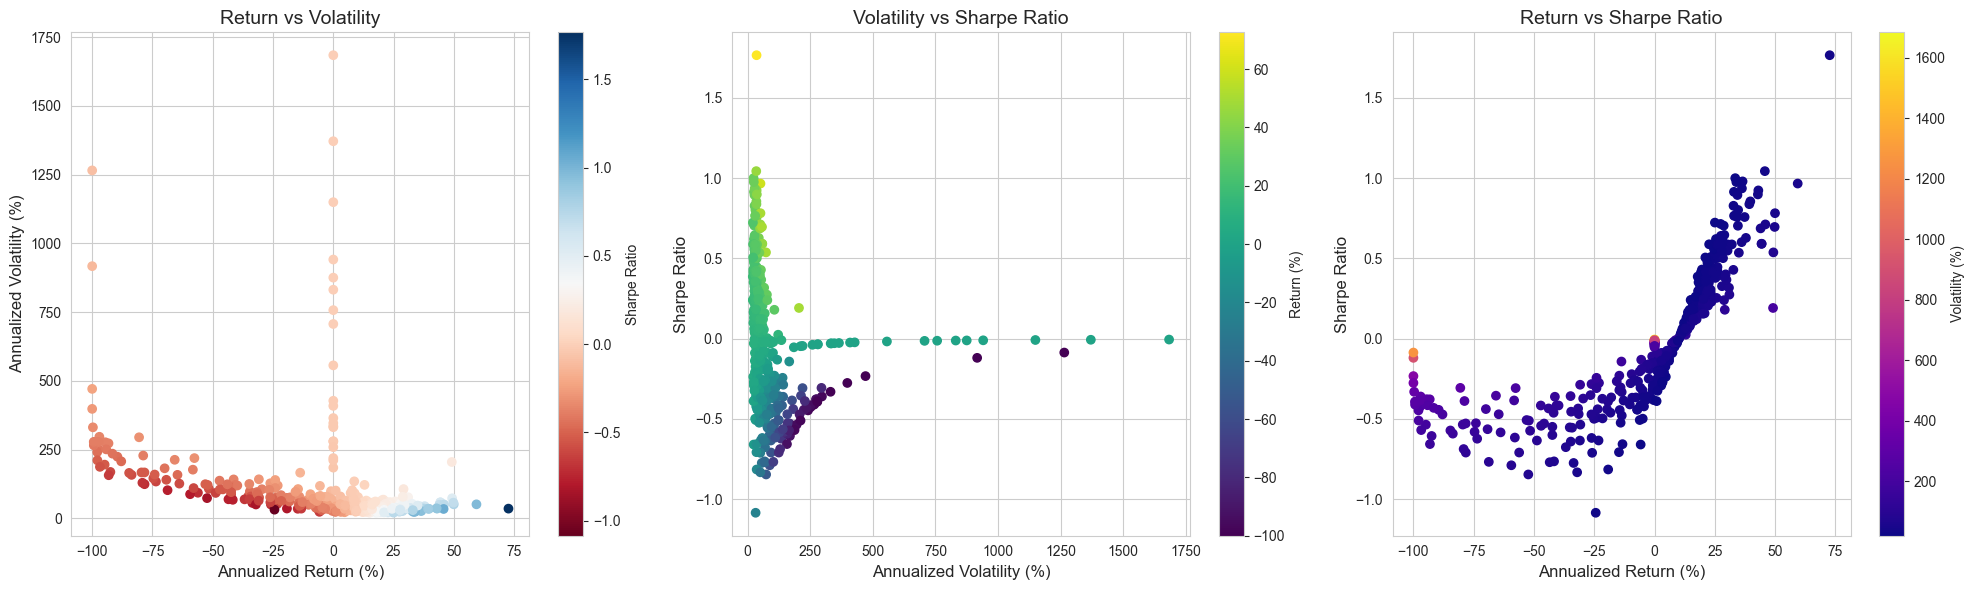

In [207]:
returns = np.array(eigen_returns) *100
vols = np.array(eigen_vols) * 100
sharpes = np.array(eigen_sharpes)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Return vs Volatility
scatter1 = axes[0].scatter(
    returns,
    vols,
    c=sharpes,
    cmap="RdBu"
)
axes[0].set_title("Return vs Volatility", fontsize=14)
axes[0].set_xlabel("Annualized Return (%)", fontsize=12)
axes[0].set_ylabel("Annualized Volatility (%)", fontsize=12)
axes[0].grid(True)
fig.colorbar(scatter1, ax=axes[0], label="Sharpe Ratio")

# Volatility vs Sharpe Ratio 
scatter2 = axes[1].scatter(
    vols,
    sharpes,
    c=returns,
    cmap="viridis"
)
axes[1].set_title("Volatility vs Sharpe Ratio", fontsize=14)
axes[1].set_xlabel("Annualized Volatility (%)", fontsize=12)
axes[1].set_ylabel("Sharpe Ratio", fontsize=12)
axes[1].grid(True)
fig.colorbar(scatter2, ax=axes[1], label="Return (%)")

#  Return vs Sharpe Ratio 
scatter3 = axes[2].scatter(
    returns,
    sharpes,
    c=vols,
    cmap="plasma"
)
axes[2].set_title("Return vs Sharpe Ratio", fontsize=14)
axes[2].set_xlabel("Annualized Return (%)", fontsize=12)
axes[2].set_ylabel("Sharpe Ratio", fontsize=12)
axes[2].grid(True)
fig.colorbar(scatter3, ax=axes[2], label="Volatility (%)")

plt.tight_layout()
plt.show()
